In [1]:
# Assignment 9: GBDT

#### Response Coding: Example

<img src='http://i.imgur.com/TufZptV.jpg' width=700px>

> The response tabel is built only on train dataset.
> For a category which is not there in train data and present in test data, we will encode them with default values
Ex: in our test data if have State: D then we encode it as [0.5, 0.05]

<ol>
    <li><strong>Apply GBDT on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)+sentiment Score of eassay(check the bellow example, include all 4 values as 4 features)</li>
            <li><font color='red'>Set 2</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <li><strong>The hyper paramter tuning (Consider any two hyper parameters)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation/simple cross validation data</li>
    <li>use gridsearch cv or randomsearch cv or you can write your own for loops to do this task</li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/Gp2DQmh.jpg' width=500px> with X-axis as <strong>n_estimators</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/fgN9aUP.jpg' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
            </ul>
    <br>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

In [2]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975, 

<h1>1. GBDT (xgboost/lightgbm) </h1>

## 1.1 Loading Data

In [3]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/

import pickle
from tqdm import tqdm
import os


<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [4]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split

X  = pd.read_csv('preprocessed_data.csv', nrows=35000)
y = X['project_is_approved'].values
si = SentimentIntensityAnalyzer()
def score(a):
    x=si.polarity_scores(a)
    return x['pos'],x['neg'],x['neu']
X[['sent_pos','sent_neg','sent_neu']] = X.apply(lambda row:(score(row['essay'])),axis=1).apply(pd.Series)
print(X)
X = X.drop(['project_is_approved'], axis=1)


      school_state teacher_prefix project_grade_category  \
0               ca            mrs          grades_prek_2   
1               ut             ms             grades_3_5   
2               ca            mrs          grades_prek_2   
3               ga            mrs          grades_prek_2   
4               wa            mrs             grades_3_5   
...            ...            ...                    ...   
34995           ny            mrs          grades_prek_2   
34996           oh            mrs          grades_prek_2   
34997           ca            mrs             grades_3_5   
34998           ca            mrs             grades_3_5   
34999           tx            mrs          grades_prek_2   

       teacher_number_of_previously_posted_projects  project_is_approved  \
0                                                53                    1   
1                                                 4                    1   
2                                                10

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)


In [6]:
train_df=X_train.copy()
train_df['y']=y_train
X_train['sent_pos']

34839    0.284
31227    0.240
8500     0.248
19511    0.307
1496     0.238
         ...  
31472    0.303
20714    0.357
28773    0.261
8872     0.246
31114    0.217
Name: sent_pos, Length: 23450, dtype: float64

<h2>1.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [7]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    
vectorizer = TfidfVectorizer(min_df=10,max_features=7000)
vectorizer.fit(X_train['essay'].values)# fit has to happen only on train data
X_train_essay_tfidf = vectorizer.transform(X_train['essay'].values)
X_test_essay_tfidf = vectorizer.transform(X_test['essay'].values)


In [8]:
# code for response coding with Laplace smoothing.
# alpha : used for laplace smoothing
# feature: ['gene', 'variation']
# df: ['train_df', 'test_df', 'cv_df']
# algorithm
# ----------
# Consider all unique values and the number of occurances of given feature in train data dataframe
# build a vector (1*9) , the first element = (number of times it occured in class1 + 10*alpha / number of time it occurred in total data+90*alpha)
# gv_dict is like a look up table, for every gene it store a (1*9) representation of it
# for a value of feature in df:
# if it is in train data:
# we add the vector that was stored in 'gv_dict' look up table to 'gv_fea'
# if it is not there is train:
# we add [1/9, 1/9, 1/9, 1/9,1/9, 1/9, 1/9, 1/9, 1/9] to 'gv_fea'
# return 'gv_fea'
# ----------------------

# get_gv_fea_dict: Get Gene varaition Feature Dict
#code taken from cancer case study
def get_fea_dict(alpha, feature, df):
    # value_count: it contains a dict like
    # print(train_df['Gene'].value_counts())
    # output:
    #        {BRCA1      174
    #         TP53       106
    #         EGFR        86
    #         BRCA2       75
    #         PTEN        69
    #         KIT         61
    #         BRAF        60
    #         ERBB2       47
    #         PDGFRA      46
    #         ...}
    # print(train_df['Variation'].value_counts())
    # output:
    # {
    # Truncating_Mutations                     63
    # Deletion                                 43
    # Amplification                            43
    # Fusions                                  22
    # Overexpression                            3
    # E17K                                      3
    # Q61L                                      3
    # S222D                                     2
    # P130S                                     2
    # ...
    # }
    value_count = train_df[feature].value_counts()
    
    # gv_dict : Gene Variation Dict, which contains the probability array for each gene/variation
    gv_dict = dict()
    
    # denominator will contain the number of time that particular feature occured in whole data
    for i, denominator in value_count.items():
        # vec will contain (p(yi==1/Gi) probability of gene/variation belongs to perticular class
        # vec is 9 diamensional vector
        vec = []
        for k in range(0,2):
            # print(train_df.loc[(train_df['Class']==1) & (train_df['Gene']=='BRCA1')])
            #         ID   Gene             Variation  Class  
            # 2470  2470  BRCA1                S1715C      1   
            # 2486  2486  BRCA1                S1841R      1   
            # 2614  2614  BRCA1                   M1R      1   
            # 2432  2432  BRCA1                L1657P      1   
            # 2567  2567  BRCA1                T1685A      1   
            # 2583  2583  BRCA1                E1660G      1   
            # 2634  2634  BRCA1                W1718L      1   
            # cls_cnt.shape[0] will return the number of rows

            cls_cnt = train_df.loc[(train_df['y']==k) & (train_df[feature]==i)]
            
            # cls_cnt.shape[0](numerator) will contain the number of time that particular feature occured in whole data
            vec.append((cls_cnt.shape[0] + alpha*10)/ (denominator + 90*alpha))

        # we are adding the gene/variation to the dict as key and vec as value
        gv_dict[i]=vec
    return gv_dict

# Get Gene variation feature
def get_feature(alpha, feature, df):
    # print(gv_dict)
    #     {'BRCA1': [0.20075757575757575, 0.03787878787878788, 0.068181818181818177, 0.13636363636363635, 0.25, 0.19318181818181818, 0.03787878787878788, 0.03787878787878788, 0.03787878787878788], 
    #      'TP53': [0.32142857142857145, 0.061224489795918366, 0.061224489795918366, 0.27040816326530615, 0.061224489795918366, 0.066326530612244902, 0.051020408163265307, 0.051020408163265307, 0.056122448979591837], 
    #      'EGFR': [0.056818181818181816, 0.21590909090909091, 0.0625, 0.068181818181818177, 0.068181818181818177, 0.0625, 0.34659090909090912, 0.0625, 0.056818181818181816], 
    #      'BRCA2': [0.13333333333333333, 0.060606060606060608, 0.060606060606060608, 0.078787878787878782, 0.1393939393939394, 0.34545454545454546, 0.060606060606060608, 0.060606060606060608, 0.060606060606060608], 
    #      'PTEN': [0.069182389937106917, 0.062893081761006289, 0.069182389937106917, 0.46540880503144655, 0.075471698113207544, 0.062893081761006289, 0.069182389937106917, 0.062893081761006289, 0.062893081761006289], 
    #      'KIT': [0.066225165562913912, 0.25165562913907286, 0.072847682119205295, 0.072847682119205295, 0.066225165562913912, 0.066225165562913912, 0.27152317880794702, 0.066225165562913912, 0.066225165562913912], 
    #      'BRAF': [0.066666666666666666, 0.17999999999999999, 0.073333333333333334, 0.073333333333333334, 0.093333333333333338, 0.080000000000000002, 0.29999999999999999, 0.066666666666666666, 0.066666666666666666],
    #      ...
    #     }
    gv_dict = get_fea_dict(alpha, feature, df)
    # value_count is similar in get_gv_fea_dict
    value_count = train_df[feature].value_counts()
    
    # gv_fea: Gene_variation feature, it will contain the feature for each feature value in the data
    gv_fea = []
    # for every feature values in the given data frame we will check if it is there in the train data then we will add the feature to gv_fea
    for index, row in df.iterrows():
        if row[feature] in dict(value_count).keys():
            gv_fea.append(gv_dict[row[feature]])
        else:
            gv_fea.append([1/2,1/2])
    return gv_fea

<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

In [9]:
from sklearn.preprocessing import Normalizer

alpha=0.5
X_train_state_res= np.array(get_feature(alpha, "school_state", X_train))
X_test_state_res=np.array(get_feature(alpha, "school_state", X_test))
X_train_teacher_res= np.array(get_feature(alpha, "teacher_prefix", X_train))
X_test_teacher_res=np.array(get_feature(alpha, "teacher_prefix", X_test))
X_train_projectgr_res= np.array(get_feature(alpha, "project_grade_category", X_train))
X_test_projectgr_res=np.array(get_feature(alpha, "project_grade_category", X_test))
X_train_clcat_res= np.array(get_feature(alpha, "clean_categories", X_train))
X_test_clcat_res=np.array(get_feature(alpha, "clean_categories", X_test))
X_train_clscat_res= np.array(get_feature(alpha, "clean_subcategories", X_train))
X_test_clscat_res=np.array(get_feature(alpha, "clean_subcategories", X_test))
normalizer = Normalizer()
normalizer.fit(X_train['price'].values.reshape(1,-1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(1,-1)).T
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(1,-1)).T

normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))


X_train_tn_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1)).T
X_test_tn_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1)).T

pos_tr=np.array(X_train['sent_pos'])
neg_tr=np.array(X_train['sent_neg'])
neu_tr=np.array(X_train['sent_neu'])
pos_te=np.array(X_test['sent_pos'])
neg_te=np.array(X_test['sent_neg'])
neu_te=np.array(X_test['sent_neu'])

sent_score_tr=np.array((pos_tr,neg_tr,neu_tr)).T
sent_score_te=np.array((pos_te,neg_te,neu_te)).T



In [10]:

from scipy.sparse import hstack
from scipy.sparse import vstack

X_tr = hstack((X_train_essay_tfidf, X_train_state_res, X_train_teacher_res, X_train_projectgr_res, X_train_price_norm,X_train_clcat_res,X_train_clscat_res,X_train_tn_norm,sent_score_tr)).tocsr()
X_te = hstack((X_test_essay_tfidf, X_test_state_res, X_test_teacher_res, X_test_projectgr_res, X_test_price_norm,X_test_clcat_res,X_test_clscat_res,X_test_tn_norm,sent_score_te)).tocsr()



<h2>1.5 Appling Models on different kind of featurization as mentioned in the instructions</h2>

<br>Apply GBDT on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

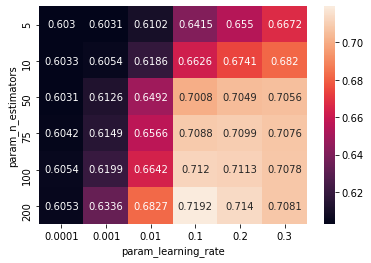

In [11]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier

neigh  = GradientBoostingClassifier()
parameters = {'learning_rate':[0.0001, 0.001, 0.01, 0.1, 0.2, 0.3] ,
             'n_estimators':[5,10,50, 75, 100, 200]}
clf = GridSearchCV(neigh, parameters, cv=6, scoring='roc_auc',return_train_score=True)
clf.fit(X_tr, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
#print(results)
results = results.sort_values(['param_n_estimators'])
max_scores = results.groupby(['param_n_estimators', 'param_learning_rate']).max()
max_scores = max_scores.unstack()[['mean_test_score', 'mean_train_score']]
sns.heatmap(max_scores.mean_test_score, annot=True, fmt='.4g')


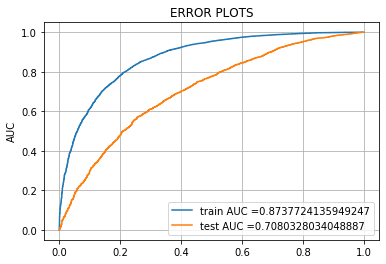

In [12]:
best_a=clf.best_params_['learning_rate']
best_b=clf.best_params_['n_estimators']


from sklearn.metrics import roc_curve, auc
from sklearn.calibration import CalibratedClassifierCV



dt = GradientBoostingClassifier(learning_rate=best_a,n_estimators=best_b)
dt.fit(X_tr, y_train)
y_train_pred=dt.predict_proba(X_tr)[:,1]
y_test_pred=dt.predict_proba(X_te)[:,1]
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()

plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()



[Text(33.0, 0.5, 'True Label'), Text(0.5, 15.0, 'Predicted Label')]

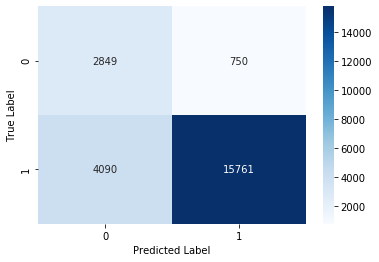

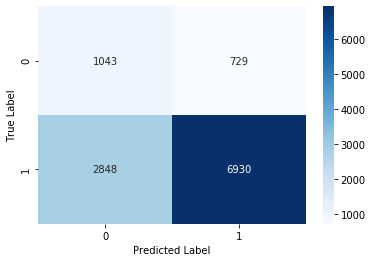

In [13]:
def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    return t

from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

train_cmatrix=confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))
test_cmatrix=confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))

import seaborn as sns
import matplotlib.pyplot as plt
ax=sns.heatmap(train_cmatrix, annot=True,fmt="d",cmap='Blues')

ax.set(ylabel="True Label", xlabel="Predicted Label")

plt.figure(2)
ax=sns.heatmap(test_cmatrix, annot=True,fmt="d",cmap='Blues')
ax.set(ylabel="True Label", xlabel="Predicted Label")


In [14]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

list_of_sentance=[]
for sentance in X_train['essay']:
    list_of_sentance.append(sentance.split())
w2v_model=Word2Vec(list_of_sentance,min_count=5,size=300, workers=4)
print(len(list_of_sentance))


23450


In [15]:

w2v_words = list(w2v_model.wv.vocab)
model = TfidfVectorizer()
model.fit(X_train['essay'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))
# TF-IDF weighted Word2Vec
tfidf_feat = model.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sentance): # for each review/sentence 
    sent_vec = np.zeros(300) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words and word in tfidf_feat:
            vec = w2v_model.wv[word]
            #tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1

100%|████████████████████████████████████████████████████████████████████████████| 23450/23450 [16:37<00:00, 23.51it/s]


In [16]:
list_of_sentance=[]
for sentance in X_test['essay']:
    list_of_sentance.append(sentance.split())
tfidf_sent_vectors_test = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sentance): # for each review/sentence 
    sent_vec = np.zeros(300) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words and word in tfidf_feat:
            vec = w2v_model.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors_test.append(sent_vec)
    row += 1

100%|████████████████████████████████████████████████████████████████████████████| 11550/11550 [08:13<00:00, 23.41it/s]


In [17]:
from scipy.sparse import coo_matrix
tfidf_sent_vectors=coo_matrix(tfidf_sent_vectors)
tfidf_sent_vectors_test=coo_matrix(tfidf_sent_vectors_test)

X_tr = hstack((tfidf_sent_vectors, X_train_state_res, X_train_teacher_res, X_train_projectgr_res, X_train_price_norm,X_train_clcat_res,X_train_clscat_res,X_train_tn_norm,sent_score_tr)).tocsr()
X_te = hstack((tfidf_sent_vectors_test, X_test_state_res, X_test_teacher_res, X_test_projectgr_res, X_test_price_norm,X_test_clcat_res,X_test_clscat_res,X_test_tn_norm,sent_score_te)).tocsr()



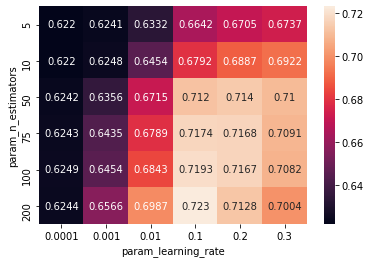

In [18]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier

neigh  = GradientBoostingClassifier()
parameters = {'learning_rate':[0.0001, 0.001, 0.01, 0.1, 0.2, 0.3] ,
             'n_estimators':[5,10,50, 75, 100, 200]}
clf = GridSearchCV(neigh, parameters, cv=6, scoring='roc_auc',return_train_score=True)
clf.fit(X_tr, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
#print(results)
results = results.sort_values(['param_n_estimators'])
max_scores = results.groupby(['param_n_estimators', 'param_learning_rate']).max()
max_scores = max_scores.unstack()[['mean_test_score', 'mean_train_score']]
sns.heatmap(max_scores.mean_test_score, annot=True, fmt='.4g')


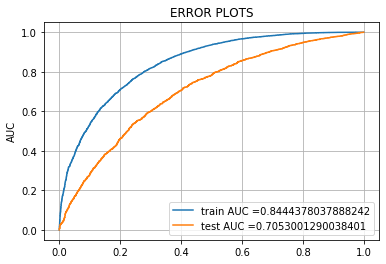

In [19]:
best_a=clf.best_params_['learning_rate']
best_b=clf.best_params_['n_estimators']


from sklearn.metrics import roc_curve, auc
from sklearn.calibration import CalibratedClassifierCV



dt = GradientBoostingClassifier(learning_rate=best_a,n_estimators=best_b)
dt.fit(X_tr, y_train)
y_train_pred=dt.predict_proba(X_tr)[:,1]
y_test_pred=dt.predict_proba(X_te)[:,1]
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()

plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()



[Text(33.0, 0.5, 'True Label'), Text(0.5, 15.0, 'Predicted Label')]

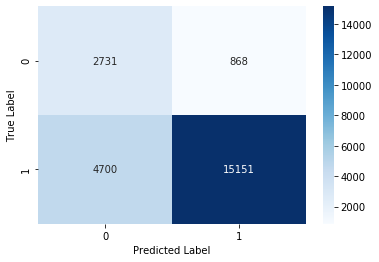

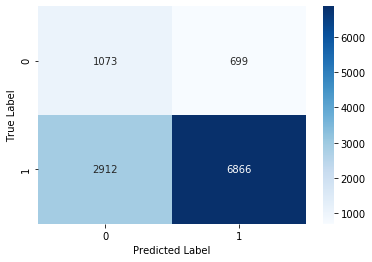

In [20]:
def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    return t

from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

train_cmatrix=confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))
test_cmatrix=confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))

import seaborn as sns
import matplotlib.pyplot as plt
ax=sns.heatmap(train_cmatrix, annot=True,fmt="d",cmap='Blues')

ax.set(ylabel="True Label", xlabel="Predicted Label")

plt.figure(2)
ax=sns.heatmap(test_cmatrix, annot=True,fmt="d",cmap='Blues')
ax.set(ylabel="True Label", xlabel="Predicted Label")


In [21]:
z=0
print(z)

0


<h1>3. Summary</h1>

<br> as mentioned in the step 4 of instructions

<table style="width:100%">
  <tr>
    <th>Vectorizer</th>
    <th>Model</th>
    <th>AUC</th>

  </tr>
  <tr>
    <td>W2V</td>
    <td>GBDT</td>
    <td>0.59</td>

  </tr>
  <tr>
    <td>TF-IDF</td>
    <td>GBDT</td>
     <td>0.53</td>

  </tr>
</table>
